In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df_ge = pd.read_csv("ge-stock/ge.us.txt")
df_ge.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579,0
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749,0
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010,0
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244,0
4,1962-01-08,0.5957,0.5957,0.5716,0.5957,3696430,0


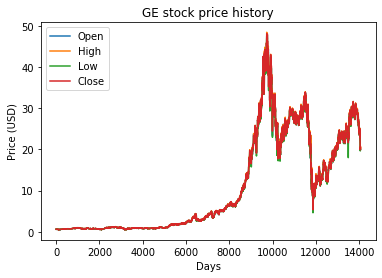

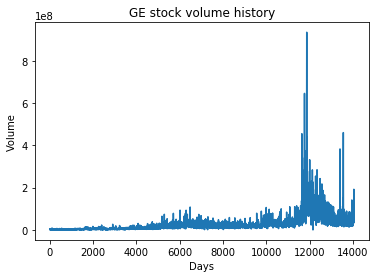

In [3]:
plt.figure()
plt.plot(df_ge["Open"])
plt.plot(df_ge["High"])
plt.plot(df_ge["Low"])
plt.plot(df_ge["Close"])
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

plt.figure()
plt.plot(df_ge["Volume"])
plt.title('GE stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [4]:
print("checking if any null values are present\n", df_ge.isna().sum())

train_cols = ["High","Low","Close"]
df_train, df_test = train_test_split(df_ge, train_size=0.8, test_size=0.2, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))
# scale the feature MinMax, build array
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])

checking if any null values are present
 Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64
Train and Test size 11246 2812


In [5]:
x_t = x_train[:,0:2]
x_t = np.expand_dims(x_t, 2)
y_t = x_train[:,2]

In [6]:
x_temp = x_test[:,0:2]
x_temp = np.expand_dims(x_temp, 2)
y_temp = x_test[:,2]

In [7]:
from keras.models import Sequential
from keras.layers import LSTM , Dropout, Dense
from keras import optimizers


Using TensorFlow backend.


In [8]:
lstm_model = Sequential()
lstm_model.add(LSTM(150, dropout=0.005, recurrent_dropout=0.005, kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(80,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
optimizer = optimizers.Adam()
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

history = lstm_model.fit(x_t, y_t, epochs=200, verbose=2,
                    shuffle=True,validation_split=0.15)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 9559 samples, validate on 1687 samples
Epoch 1/200
 - 4s - loss: 0.0203 - val_loss: 0.0036
Epoch 2/200
 - 2s - loss: 8.0787e-04 - val_loss: 0.0022
Epoch 3/200
 - 2s - loss: 6.3898e-04 - val_loss: 0.0011
Epoch 4/200
 - 2s - loss: 4.2582e-04 - val_loss: 6.7825e-04
Epoch 5/200
 - 2s - loss: 3.3269e-04 - val_loss: 0.0013
Epoch 6/200
 - 2s - loss: 2.2927e-04 - val_loss: 7.5919e-04
Epoch 7/200
 - 2s - loss: 2.5591e-04 - val_loss: 0.0011
Epoch 8/200
 - 2s - loss: 2.5874e-04 - val_loss: 0.0010
Epoch 9/200
 - 2s - loss: 2.0461e-04 - val_loss: 8.5054e-04
Epoch 10/200
 - 2s - loss: 1.6853e-04 - val_loss: 0.0012
Epoch 11/200
 - 2s - loss: 2.4946e-04 - val_loss: 6.2535e-04
Epoch 12/200
 - 2s - loss: 2.0102e-04 - val_loss: 6.5416e-04
Epoch 13/200
 - 2s - loss: 3.4897e-04 - val_lo

Epoch 100/200
 - 2s - loss: 7.1800e-05 - val_loss: 2.0717e-04
Epoch 101/200
 - 2s - loss: 6.1609e-05 - val_loss: 1.4171e-04
Epoch 102/200
 - 2s - loss: 8.7387e-05 - val_loss: 1.6169e-04
Epoch 103/200
 - 2s - loss: 7.6721e-05 - val_loss: 2.8050e-04
Epoch 104/200
 - 2s - loss: 8.1545e-05 - val_loss: 4.2300e-04
Epoch 105/200
 - 2s - loss: 6.8149e-05 - val_loss: 1.4966e-04
Epoch 106/200
 - 2s - loss: 5.7140e-05 - val_loss: 2.5307e-04
Epoch 107/200
 - 2s - loss: 8.0944e-05 - val_loss: 1.8288e-04
Epoch 108/200
 - 2s - loss: 6.6907e-05 - val_loss: 3.2555e-04
Epoch 109/200
 - 2s - loss: 6.8489e-05 - val_loss: 1.5508e-04
Epoch 110/200
 - 2s - loss: 6.4735e-05 - val_loss: 2.3243e-04
Epoch 111/200
 - 3s - loss: 6.8266e-05 - val_loss: 1.7041e-04
Epoch 112/200
 - 2s - loss: 6.8887e-05 - val_loss: 1.9025e-04
Epoch 113/200
 - 2s - loss: 6.3300e-05 - val_loss: 3.1358e-04
Epoch 114/200
 - 2s - loss: 6.3314e-05 - val_loss: 2.6725e-04
Epoch 115/200
 - 2s - loss: 6.3238e-05 - val_loss: 2.3512e-04
Epoch 11

In [9]:
predictions = lstm_model.predict(x_temp)

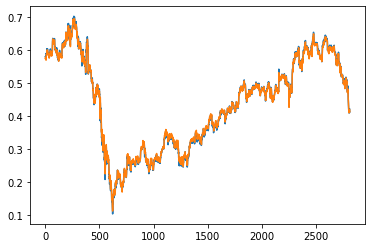

In [10]:
plt.figure()
plt.plot(y_temp)
plt.plot(predictions)
plt.show()

In [11]:
np.savetxt("test_data.csv", x_test, delimiter=",")

In [12]:
lstm_model.save("regression.h5")